<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#L'obiettivo" data-toc-modified-id="L'obiettivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>L'obiettivo</a></span></li><li><span><a href="#Importare-i-dati" data-toc-modified-id="Importare-i-dati-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importare i dati</a></span></li><li><span><a href="#Preparazione-dei-dati" data-toc-modified-id="Preparazione-dei-dati-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparazione dei dati</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Data-types" data-toc-modified-id="Data-types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data types</a></span></li></ul></li><li><span><a href="#Separando-i-dati-per-la-validazione" data-toc-modified-id="Separando-i-dati-per-la-validazione-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separando i dati per la validazione</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Xgboost</a></span></li></ul></li><li><span><a href="#Interpretabilità" data-toc-modified-id="Interpretabilità-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interpretabilità</a></span><ul class="toc-item"><li><span><a href="#Permutation-importance" data-toc-modified-id="Permutation-importance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Permutation importance</a></span></li></ul></li><li><span><a href="#Posso-prevedere-il-numero-di-aggiudicazioni?" data-toc-modified-id="Posso-prevedere-il-numero-di-aggiudicazioni?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Posso prevedere il numero di aggiudicazioni?</a></span><ul class="toc-item"><li><span><a href="#Permutation-importance" data-toc-modified-id="Permutation-importance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Permutation importance</a></span></li></ul></li><li><span><a href="#Ottimizzazione-degli-iperparametri" data-toc-modified-id="Ottimizzazione-degli-iperparametri-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ottimizzazione degli iperparametri</a></span></li></ul></div>

# L'obiettivo

Come primo passo, cerco di controllare se ci siano cambiamenti sostanziali fra i dati per il 2018 ed il 2019. Più precisamente, se possa costruire un modello di classificazione dove le classi sono "Appartiene al 2018" o "Appartiene al 2019" ([adversarial validation](http://manishbarnwal.com/blog/2017/02/15/introduction_to_adversarial_validation/)).

Se riesco a costruire un *buon* modello predittivo, significa che ci sono variazioni significative fra i due anni. Normalmente, escluderei le variabili che sono rilevanti per distinguere il 2018 dal 2019 in un modello addestrato (trained) per prevedere il 2019. Lo posso fare senza conoscere la variabile che voglio stimare per il 2019. 

Ma in questo caso, voglio trovare quali variabili permettono di distinguere il 2018 dal 2019 come strumento per sinteticamente descrivere le differenze fra 2018 e 2019.

# Importare i dati

Come primo passo, importo i dati per il 2018 ed il 2019 per i fornitori. 

In [1]:
import pandas as pd


a2018 = pd.read_csv(
    "../input/fornitori2018.csv", skiprows=0, encoding="ISO-8859-1", decimal=","
)
print(a2018.shape)
a2018.head()

(110876, 12)


,#Partita_Iva,Ragione_Sociale,Forma_Societaria,Nazione_Sede_legale,Regione_Sede_legale,Provincia_Sede_legale,Comune_Sede_legale,Indirizzo_Sede_legale,Numero_Aggiudicazioni,Numero_Abilitazioni,Numero_Transazioni,Numero_Contratti_attivi
0,02455120226,\tSEA CONSULENZE E SERVIZI,Società a Responsabilità Limitata,ITALIA,TRENTINO ALTO ADIGE,TRENTO,TRENTO,VIA UNTERVEGER 52 - TRENTO,0,6,3,3
1,03475830711,ARPATEK SRL,Società a Responsabilità Limitata,ITALIA,PUGLIA,FOGGIA,FOGGIA,VIA MANFREDONIA KM 2.200,0,1,0,0
2,00688650217,CAPONE PIETRO S.R.L.,Società a Responsabilità Limitata,ITALIA,TRENTINO ALTO ADIGE,BOLZANO/BOZEN,BOLZANO/BOZEN,"VIA COPERNICO, 7",0,1,0,0
3,02903790802,F.LLI SACCO S.R.L.S.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,BENESTARE,"BENESTARE (RC) , C/DA BRUCA, 68",0,1,0,0
4,02303790808,SEGECO S.R.L.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,CAMPO CALABRO,"VIA SACERDOTE SCOPELLITI, 53",0,3,0,0


In [2]:
a2019 = pd.read_csv(
    "../input/fornitori2019.csv", skiprows=0, encoding="ISO-8859-1", decimal=","
)
print(a2019.shape)
a2019.head()

(137551, 14)


,#Partita_Iva,Ragione_Sociale,Forma_Societaria,Nazione_Sede_legale,Regione_Sede_legale,Provincia_Sede_legale,Comune_Sede_legale,Indirizzo_Sede_legale,Latitudine_Sede_legale,Longitudine_Sede_legale,Numero_Aggiudicazioni,Numero_Abilitazioni,Numero_Transazioni,Numero_Contratti_attivi
0,00688650217,CAPONE PIETRO S.R.L.,Società a Responsabilità Limitata,ITALIA,TRENTINO ALTO ADIGE,BOLZANO/BOZEN,BOLZANO/BOZEN,"VIA COPERNICO, 7",46.47142,11.32011,0,1,0,0
1,03024340808,ECO. GROUP S.R.L.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,ARDORE,"C/DA SERRA, SNC FRAZ. MARINA",38.17991,16.20984,0,9,0,0
2,02903790802,F.LLI SACCO S.R.L.S.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,BENESTARE,"BENESTARE (RC) , C/DA BRUCA, 68",38.18399,16.13998,0,1,3,3
3,02303790808,SEGECO S.R.L.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,CAMPO CALABRO,"VIA SACERDOTE SCOPELLITI, 53",38.21941,15.65679,0,3,0,0
4,02972900803,SOPHIA S.R.L.,Società a Responsabilità Limitata,ITALIA,CALABRIA,REGGIO DI CALABRIA,SANT'AGATA DEL BIANCO,"VIA MAZZINI, 27",38.09197,16.08343,0,3,0,0


I dati per il 2019 sono più numerosi, quindi se usassi come criterio l'accuratezza nel prevedere l'appartenenza al 2018/2019. Di conseguenza, uso l'AUC. 

Ma prima, la preparazione dei dati.

# Preparazione dei dati

In [3]:
a2018["year"] = 2018
a2018.columns

Index(['#Partita_Iva', 'Ragione_Sociale', 'Forma_Societaria',
       'Nazione_Sede_legale', 'Regione_Sede_legale', 'Provincia_Sede_legale',
       'Comune_Sede_legale', 'Indirizzo_Sede_legale', 'Numero_Aggiudicazioni',
       'Numero_Abilitazioni', 'Numero_Transazioni', 'Numero_Contratti_attivi',
       'year'],
      dtype='object')

In [4]:
a2019["year"] = 2019
a2019.columns

Index(['#Partita_Iva', 'Ragione_Sociale', 'Forma_Societaria',
       'Nazione_Sede_legale', 'Regione_Sede_legale', 'Provincia_Sede_legale',
       'Comune_Sede_legale', 'Indirizzo_Sede_legale', 'Latitudine_Sede_legale',
       'Longitudine_Sede_legale', 'Numero_Aggiudicazioni',
       'Numero_Abilitazioni', 'Numero_Transazioni', 'Numero_Contratti_attivi',
       'year'],
      dtype='object')

Considero solo le colonne in comune ai due data sets:

In [5]:
common = set(a2018.columns).intersection(set(a2019.columns))
print(common)

{'Comune_Sede_legale', 'Numero_Abilitazioni', '#Partita_Iva', 'year', 'Indirizzo_Sede_legale', 'Numero_Transazioni', 'Nazione_Sede_legale', 'Forma_Societaria', 'Regione_Sede_legale', 'Provincia_Sede_legale', 'Numero_Aggiudicazioni', 'Numero_Contratti_attivi', 'Ragione_Sociale'}


Creo un unico dataset:

In [6]:
df = pd.concat((a2018[common], a2019[common]), axis=0)
df.shape

(248427, 13)

In [7]:
set(df["Forma_Societaria"])

{'ASSOCIAZIONI/ENTI NON ONLUS',
 "AZIENDA CON PARTECIPAZIONE DI CAPITALE PUBBLICO e UNIVERSITA'",
 'Altro (Cooperativa Sociale, Fondazione, ...)',
 'Altro (Cooperativa Sociale, Fondazione, Associazioni, ...)',
 'Consorzio fra società cooperative di produzione e lavoro/Consorzio fra imprese artigiane',
 'Consorzio stabile',
 'Impresa Individuale',
 'ONLUS',
 'Professione non organizzata in ordini o collegi (cfr. L. 4/2013)',
 'Professione organizzata (cfr. Art. 2229 cc)',
 'Rete di imprese',
 'Società Cooperativa',
 'Società a Responsabilità Limitata',
 'Società costituita in altro Stato Membro UE',
 'Società costituita in altro Stato extra UE',
 'Società in Accomandita Semplice',
 'Società in Accomandita per azioni',
 'Società in Nome Collettivo',
 'Società per Azioni',
 'Società semplice',
 nan}

## Missing values

In [8]:
df.isnull().mean()

Comune_Sede_legale         0.000064
Numero_Abilitazioni        0.000000
#Partita_Iva               0.000105
year                       0.000000
Indirizzo_Sede_legale      0.000040
Numero_Transazioni         0.000000
Nazione_Sede_legale        0.000032
Forma_Societaria           0.000338
Regione_Sede_legale        0.000064
Provincia_Sede_legale      0.000064
Numero_Aggiudicazioni      0.000000
Numero_Contratti_attivi    0.000000
Ragione_Sociale            0.000000
dtype: float64

I dati mancanti sono per variabili categoriche. Rimpiazzo con un valore "Missing":

In [9]:
d = {
    "Provincia_Sede_legale": "Missing",
    "Nazione_Sede_legale": "Missing",
    "Comune_Sede_legale": "Missing",
    "Forma_Societaria": "Missing",
    "Regione_Sede_legale": "Missing",
    "#Partita_Iva": "Missing",
}
df.fillna("Missing", inplace=True)

In [10]:
df.isnull().sum()

Comune_Sede_legale         0
Numero_Abilitazioni        0
#Partita_Iva               0
year                       0
Indirizzo_Sede_legale      0
Numero_Transazioni         0
Nazione_Sede_legale        0
Forma_Societaria           0
Regione_Sede_legale        0
Provincia_Sede_legale      0
Numero_Aggiudicazioni      0
Numero_Contratti_attivi    0
Ragione_Sociale            0
dtype: int64

## Data types

Controllo il tipo delle colonne:

In [11]:
df.dtypes

Comune_Sede_legale         object
Numero_Abilitazioni         int64
#Partita_Iva               object
year                        int64
Indirizzo_Sede_legale      object
Numero_Transazioni          int64
Nazione_Sede_legale        object
Forma_Societaria           object
Regione_Sede_legale        object
Provincia_Sede_legale      object
Numero_Aggiudicazioni       int64
Numero_Contratti_attivi     int64
Ragione_Sociale            object
dtype: object

Le variabili di tipo ``object`` sono variabili categoriche. La versione che sto usando di ``pandas`` è la seguente:

In [12]:
pd.__version__

'1.0.3'

Quindi:

In [13]:
categorical_columns = [
    "#Partita_Iva",
    "Provincia_Sede_legale",
    "Regione_Sede_legale",
    "Ragione_Sociale",
    "Forma_Societaria",
    "Comune_Sede_legale",
    "Nazione_Sede_legale",
    "Indirizzo_Sede_legale"
]

for i in categorical_columns:
    df[i] = df[i].astype("category")

df.dtypes

Comune_Sede_legale         category
Numero_Abilitazioni           int64
#Partita_Iva               category
year                          int64
Indirizzo_Sede_legale      category
Numero_Transazioni            int64
Nazione_Sede_legale        category
Forma_Societaria           category
Regione_Sede_legale        category
Provincia_Sede_legale      category
Numero_Aggiudicazioni         int64
Numero_Contratti_attivi       int64
Ragione_Sociale            category
dtype: object

Quanti valori distinti ci sono per colonna?

In [14]:
df.nunique()

Comune_Sede_legale           6900
Numero_Abilitazioni            72
#Partita_Iva               149213
year                            2
Indirizzo_Sede_legale      141287
Numero_Transazioni            653
Nazione_Sede_legale            32
Forma_Societaria               21
Regione_Sede_legale            22
Provincia_Sede_legale         112
Numero_Aggiudicazioni          13
Numero_Contratti_attivi       746
Ragione_Sociale            148200
dtype: int64

In [15]:
df = df.sample(df.shape[0], random_state=2020)

Ho fissato il random state per assicurare la riproducibilità dei calcoli (a parità di versione delle librerie usate).

In [16]:
df.head(n=10)

,Comune_Sede_legale,Numero_Abilitazioni,#Partita_Iva,year,Indirizzo_Sede_legale,Numero_Transazioni,Nazione_Sede_legale,Forma_Societaria,Regione_Sede_legale,Provincia_Sede_legale,Numero_Aggiudicazioni,Numero_Contratti_attivi,Ragione_Sociale
135713,CARMAGNOLA,3,10169750014,2019,"PIAZZA IV MARTIRI, 33",0,ITALIA,Società a Responsabilità Limitata,PIEMONTE,TORINO,0,0,VM SERVICE S.R.L.
108481,ROMA,2,00903541001,2019,VIA DI CASTEL ROMANO 100,3,ITALIA,Società per Azioni,LAZIO,ROMA,0,3,RINA CONSULTING - CENTRO SVILUPPO MATERIALI SPA
3993,CONSELVE,6,04563110289,2019,"VIA VITTORIO EMANUELE II, 51",2,ITALIA,Società a Responsabilità Limitata,VENETO,PADOVA,0,2,ALBA
76277,RIMINI,1,02441440407,2018,VIALE WALTER GHELFI 24,13,ITALIA,Società a Responsabilità Limitata,EMILIA ROMAGNA,RIMINI,0,13,NOVADYS ITALIA
77420,CITTA' DI CASTELLO,4,00176050540,2018,VIA UMBERTO GIORDANO 7,3,ITALIA,Società in Accomandita Semplice,UMBRIA,PERUGIA,0,3,OFFICINA DEL TRATTORE SAS DI TIRIMBELLI ROBERT...
43796,SESTOLA,5,01367780366,2019,VIA PROVINCIALE VECCHIA N° 11,0,ITALIA,Società in Nome Collettivo,EMILIA ROMAGNA,MODENA,0,0,EDILTER DI MAMMI MARIO & C. S.N.C.
95360,TERNI,4,00387050552,2019,"VIA MAESTRI DEL LAVORO, 24/B",0,ITALIA,Società a Responsabilità Limitata,UMBRIA,TERNI,0,1,NOVEDIL S.R.L.
8049,SILEA,1,04056590260,2018,VIA TREVISO 51,4,ITALIA,Società in Accomandita Semplice,VENETO,TREVISO,0,4,ARTUFFICIO
69926,VERONA,1,02182910238,2018,"STRADELLA LOBBIA, 2",2,ITALIA,Impresa Individuale,VENETO,VERONA,0,2,MAZZAI ADRIANO
101764,PUTIGNANO,6,07299500723,2018,"VIA ESTRAMURALE A LEVANTE, 86",0,ITALIA,Impresa Individuale,PUGLIA,BARI,0,0,TECNO GARDEN DI PATRUNO DONATO


# Separando i dati per la validazione

In [17]:
import sklearn
import category_encoders

print(sklearn.__version__)
print(category_encoders.__version__)

0.22.2.post1
2.1.0


Voglio prevedere a quale anno i dati fanno riferimento. Separo ``year`` dai dati:

In [18]:
Y = df["year"]
X = df.drop(["year"], axis=1)

Converto $Y$ a 0/1:

In [19]:
Y = Y.map({2018: "0", 2019: "1"})

## Random Forest

Iterando sul numero di fold:

In [20]:
from category_encoders import CatBoostEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score



kf = KFold(n_splits=10, random_state=2020, shuffle=True)
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(random_state=2020).fit(X_train, Y_train)
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]

In [21]:
import numpy as np


print(np.mean(auc_score), "+/-", np.std(auc_score))

0.33555104649244916 +/- 0.0024426874528733814


## Xgboost

In [22]:
from xgboost import XGBClassifier


auc_score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = XGBClassifier(random_state=2020).fit(X_train, Y_train)
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.4268100327280987 +/- 0.0030224766056453608


Questo senza ottimizzare gli iper-parametri. Significa che conoscere i dati per il 2018 non aiuta molto a prevedere i dati per il 2019.

# Interpretabilità

Faccio un trading su tutti i dati:

In [23]:
encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X, Y)
X = encoder.transform(X)


model = XGBClassifier(random_state=2020).fit(X, Y)

## Permutation importance

Come riferimento per l'explainability del modello (per una spiegazione dettagliata) considero il [corso di Kaggle](https://www.kaggle.com/dansbecker/permutation-importance).

Per valutare límportanza delle singole variabili si può testare quanto migliori siano le variabili originalu rispetto a delle permutazioni casuali. Se permutare le variabili non danneggia significativamente le performance del modello (o addirittura le migliora) le variabili non sono rilevanti. Nella prossima tabella viene riportata la differenza in performance dovuta alla permutazione casuale delle variabili:

In [24]:
import eli5


eli5.__version__

/home/marco/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/marco/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/home/marco/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) o

'0.10.1'

In [25]:
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state=2020).fit(X, Y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0830 ± 0.0009,Numero_Contratti_attivi
0.0586 ± 0.0014,Numero_Transazioni
0.0542 ± 0.0006,#Partita_Iva
0.0194 ± 0.0008,Forma_Societaria
0.0191 ± 0.0008,Indirizzo_Sede_legale
0.0136 ± 0.0005,Ragione_Sociale
0.0133 ± 0.0010,Comune_Sede_legale
0.0101 ± 0.0009,Numero_Abilitazioni
0.0044 ± 0.0005,Provincia_Sede_legale
0.0034 ± 0.0005,Regione_Sede_legale


In [26]:
X.columns

Index(['Comune_Sede_legale', 'Numero_Abilitazioni', '#Partita_Iva',
       'Indirizzo_Sede_legale', 'Numero_Transazioni', 'Nazione_Sede_legale',
       'Forma_Societaria', 'Regione_Sede_legale', 'Provincia_Sede_legale',
       'Numero_Aggiudicazioni', 'Numero_Contratti_attivi', 'Ragione_Sociale'],
      dtype='object')

# Posso prevedere il numero di aggiudicazioni?

In [27]:
set(df["Numero_Aggiudicazioni"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15}

In [28]:
df.head()

,Comune_Sede_legale,Numero_Abilitazioni,#Partita_Iva,year,Indirizzo_Sede_legale,Numero_Transazioni,Nazione_Sede_legale,Forma_Societaria,Regione_Sede_legale,Provincia_Sede_legale,Numero_Aggiudicazioni,Numero_Contratti_attivi,Ragione_Sociale
135713,CARMAGNOLA,3,10169750014,2019,"PIAZZA IV MARTIRI, 33",0,ITALIA,Società a Responsabilità Limitata,PIEMONTE,TORINO,0,0,VM SERVICE S.R.L.
108481,ROMA,2,00903541001,2019,VIA DI CASTEL ROMANO 100,3,ITALIA,Società per Azioni,LAZIO,ROMA,0,3,RINA CONSULTING - CENTRO SVILUPPO MATERIALI SPA
3993,CONSELVE,6,04563110289,2019,"VIA VITTORIO EMANUELE II, 51",2,ITALIA,Società a Responsabilità Limitata,VENETO,PADOVA,0,2,ALBA
76277,RIMINI,1,02441440407,2018,VIALE WALTER GHELFI 24,13,ITALIA,Società a Responsabilità Limitata,EMILIA ROMAGNA,RIMINI,0,13,NOVADYS ITALIA
77420,CITTA' DI CASTELLO,4,00176050540,2018,VIA UMBERTO GIORDANO 7,3,ITALIA,Società in Accomandita Semplice,UMBRIA,PERUGIA,0,3,OFFICINA DEL TRATTORE SAS DI TIRIMBELLI ROBERT...


In [29]:
Y_train = a2018["Numero_Aggiudicazioni"]
X_train = a2018.drop(["Numero_Aggiudicazioni", "year"], axis=1)

Y_test = a2019["Numero_Aggiudicazioni"]
X_test = a2019.drop(
    [
        "Numero_Aggiudicazioni",
        "Latitudine_Sede_legale",
        "Longitudine_Sede_legale",
        "year",
    ],
    axis=1,
)

In [30]:
from category_encoders import CatBoostEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error



encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X_train, Y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

model = RandomForestRegressor(random_state=2020).fit(X_train, Y_train)
print(mean_squared_error(Y_test, model.predict(X_test)))

0.005658462682144116


## Permutation importance

In [31]:
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state=2020).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2525 ± 0.0399,Regione_Sede_legale
0.2486 ± 0.0534,Numero_Contratti_attivi
0.1702 ± 0.0317,Numero_Transazioni
0.1521 ± 0.0371,Numero_Abilitazioni
0.0525 ± 0.0120,Indirizzo_Sede_legale
0.0227 ± 0.0292,Provincia_Sede_legale
0.0076 ± 0.0033,Ragione_Sociale
0.0009 ± 0.0000,#Partita_Iva
0 ± 0.0000,Nazione_Sede_legale
-0.0260 ± 0.0079,Forma_Societaria


In [32]:
Y_train = a2018["Numero_Aggiudicazioni"]
X_train = a2018.drop(
    ["Numero_Aggiudicazioni", "year", "Forma_Societaria", "Comune_Sede_legale"], axis=1
)

Y_test = a2019["Numero_Aggiudicazioni"]
X_test = a2019.drop(
    [
        "Numero_Aggiudicazioni",
        "Latitudine_Sede_legale",
        "Longitudine_Sede_legale",
        "year",
        "Forma_Societaria",
        "Comune_Sede_legale",
    ],
    axis=1,
)

categorical_columns = [
    "#Partita_Iva",
    "Ragione_Sociale",
    "Nazione_Sede_legale",
    "Regione_Sede_legale",
    "Provincia_Sede_legale",
    "Indirizzo_Sede_legale",
    "Numero_Contratti_attivi",
]
encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X_train, Y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

model = RandomForestRegressor(random_state=2020).fit(X_train, Y_train)
print(mean_squared_error(Y_test, model.predict(X_test)))

0.00630720144288892


In [33]:
pd.DataFrame(Y_test.value_counts())

,Numero_Aggiudicazioni
0,137441
1,66
2,26
6,5
3,4
5,3
8,2
4,2
9,1
7,1


In [34]:
pd.DataFrame(pd.Series([int(round(x)) for x in model.predict(X_test)]).value_counts())

,0
0,137409
1,98
2,22
3,10
4,9
9,1
6,1
5,1


I dati sono molto sbilanciati e la metrica tranne in inganno (basta prevedere tutto zero per essere preciso). Converto in un problema di classificazione: voglio scoprire se un fonitore si aggiudicherà o meno un contratto.

In [35]:
Y_train = np.where(a2018["Numero_Aggiudicazioni"] != 0, 1, 0)
X_train = a2018.drop(
    ["Numero_Aggiudicazioni", "year", "Forma_Societaria", "Comune_Sede_legale"], axis=1
)

Y_test = np.where(a2019["Numero_Aggiudicazioni"] != 0, 1, 0)
X_test = a2019.drop(
    [
        "Numero_Aggiudicazioni",
        "Latitudine_Sede_legale",
        "Longitudine_Sede_legale",
        "year",
        "Forma_Societaria",
        "Comune_Sede_legale",
    ],
    axis=1,
)

categorical_columns = [
    "#Partita_Iva",
    "Ragione_Sociale",
    "Nazione_Sede_legale",
    "Regione_Sede_legale",
    "Provincia_Sede_legale",
    "Indirizzo_Sede_legale",
    "Numero_Contratti_attivi",
]
encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X_train, Y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

model = RandomForestClassifier(random_state=2020).fit(X_train, Y_train)
print(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

0.6980412090874035


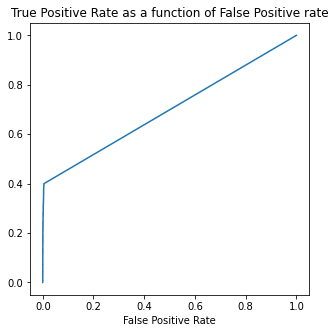

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

%matplotlib inline


fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(5, 5))
plt.title("True Positive Rate as a function of False Positive rate")
plt.xlabel("False Positive Rate")
plt.plot(fpr, tpr)
plt.savefig("Fornitori.png", dpi=1200, bbox_inches="tight")
plt.show()

# Ottimizzazione degli iperparametri

In [46]:
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(random_state=2020).fit(
        X_train, Y_train
    )
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.5174286754683435 +/- 0.002873103431316298


In [37]:
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(random_state=2020, n_estimators=200).fit(
        X_train, Y_train
    )
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.51715011409245 +/- 0.0028999742017963744


In [38]:
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(random_state=2020, n_estimators=10).fit(
        X_train, Y_train
    )
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.520697306354252 +/- 0.0033645161116511034


In [39]:
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(
        random_state=2020, n_estimators=200, max_features=2, max_depth=2
    ).fit(X_train, Y_train)
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.6143144211510048 +/- 0.003480823923295021


Questo modello è di gran lunga il migliore. Facendo il training su tutti i dati del 2018 si ottiene un buon valore per la AUC:

In [40]:
Y_train = np.where(a2018["Numero_Aggiudicazioni"] != 0, 1, 0)
X_train = a2018.drop(
    ["Numero_Aggiudicazioni", "year", "Forma_Societaria", "Comune_Sede_legale"], axis=1
)

Y_test = np.where(a2019["Numero_Aggiudicazioni"] != 0, 1, 0)
X_test = a2019.drop(
    [
        "Numero_Aggiudicazioni",
        "Latitudine_Sede_legale",
        "Longitudine_Sede_legale",
        "year",
        "Forma_Societaria",
        "Comune_Sede_legale",
    ],
    axis=1,
)

categorical_columns = [
    "#Partita_Iva",
    "Ragione_Sociale",
    "Nazione_Sede_legale",
    "Regione_Sede_legale",
    "Provincia_Sede_legale",
    "Indirizzo_Sede_legale",
    "Numero_Contratti_attivi",
]
encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X_train, Y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

model = RandomForestClassifier(random_state=2020, n_estimators=200, max_features=2, max_depth=2).fit(
    X_train, Y_train
)
print(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

0.905248268513233


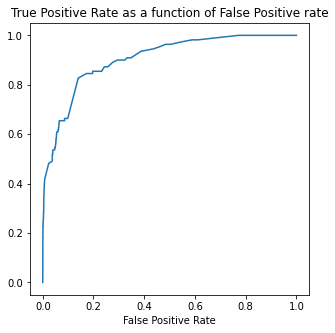

In [41]:
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(5, 5))
plt.title("True Positive Rate as a function of False Positive rate")
plt.xlabel("False Positive Rate")
plt.plot(fpr, tpr)
plt.savefig("Fornitori_90.png", dpi=1200, bbox_inches="tight")
plt.show()

In [42]:
perm = PermutationImportance(model, random_state=2020).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/home/marco/.local/lib/python3.6/site-packages/eli5/formatters/html.py:235: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,Numero_Contratti_attivi
0 ± 0.0000,Numero_Transazioni
0 ± 0.0000,Numero_Abilitazioni
0 ± 0.0000,Indirizzo_Sede_legale
0 ± 0.0000,Provincia_Sede_legale
0 ± 0.0000,Regione_Sede_legale
0 ± 0.0000,Nazione_Sede_legale
0 ± 0.0000,Ragione_Sociale
0 ± 0.0000,#Partita_Iva


In [43]:
np.mean(Y_train)

0.000820736678812367

In [44]:
np.mean(Y_test)

0.000799703382745309

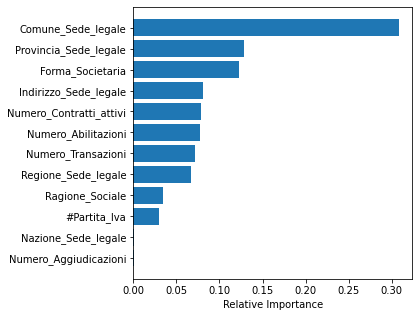

In [49]:
from matplotlib import rc


features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

rc("font", **{"family": "sans-serif", "sans-serif": ["DejaVu Sans"]})

plt.figure(figsize=(5, 5))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("feature_importance.png", dpi=2400, bbox_inches="tight")
plt.show()

In [51]:
print(X_train["Forma_Societaria"])

135713    0.541409
108481    0.527122
3993      0.541409
76277     0.541409
77420     0.525258
            ...   
87393     0.541409
18523     0.549381
2394      0.533195
60455     0.541409
41824     0.527122
Name: Forma_Societaria, Length: 223585, dtype: float64


In [71]:
df["label"] = np.where(df["Numero_Aggiudicazioni"] != 0, 1, 0)
df[["Forma_Societaria", "label"]].groupby("Forma_Societaria").agg("mean").sort_values("label")

,label
Forma_Societaria,
ASSOCIAZIONI/ENTI NON ONLUS,0.000000
Società in Nome Collettivo,0.000000
Società in Accomandita per azioni,0.000000
Società costituita in altro Stato extra UE,0.000000
Società costituita in altro Stato Membro UE,0.000000
Rete di imprese,0.000000
Professione non organizzata in ordini o collegi (cfr. L. 4/2013),0.000000
ONLUS,0.000000
Professione organizzata (cfr. Art. 2229 cc),0.000000


array([0, 0, 0, ..., 0, 0, 0])